## dependencies

In [1]:
import pandas as pd

pd.options.display.float_format = '{: .2f}'.format

In [2]:
# 가장 최근의 2021년 7월~ 12월 (6개월) 데이터 로드

df = pd.read_csv('../data/한국전력공사_전기차충전소충전량(202107_202112).csv', 
                 parse_dates=['충전종료일자', '충전시작시각', '충전종료시각'], 
                 encoding='cp949') 

In [3]:
df.head()

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,강원,강원직할,강원직할,완속05,1296,강원도 춘천시 수풍골길 7,완속,7.00,13.17,2,39,2021-07-01,2021-07-01 19:35:55,2021-07-01 22:15:42
1,남서울,남서울직할,남서울직할,급속01,8858,서울특별시 영등포구 여의도동 21,급속,50.00,15.84,0,24,2021-07-01,2021-07-01 14:30:46,2021-07-01 14:54:51
2,남서울,남서울직할,남서울직할,급속01,8858,서울특별시 영등포구 여의도동 21,급속,50.00,11.70,0,43,2021-07-01,2021-07-01 16:52:38,2021-07-01 17:36:36
3,강원,강원직할,강원직할,완속02,1293,강원도 춘천시 수풍골길 7,완속,7.00,5.40,1,23,2021-07-01,2021-07-01 10:58:58,2021-07-01 12:22:29
4,강원,강원직할,강원직할,완속02,1293,강원도 춘천시 수풍골길 7,완속,7.00,5.53,2,11,2021-07-01,2021-07-01 16:46:25,2021-07-01 18:58:12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   본부      1048575 non-null  object        
 1   사업소     1048575 non-null  object        
 2   충전소명    1048575 non-null  object        
 3   충전기     1048575 non-null  object        
 4   충전기ID   1048575 non-null  int64         
 5   주소      1048297 non-null  object        
 6   충전기구분   1048575 non-null  object        
 7   충전용량    1021666 non-null  float64       
 8   충전량     1048575 non-null  float64       
 9   충전시간    1048575 non-null  int64         
 10  충전분     1048575 non-null  int64         
 11  충전종료일자  1048575 non-null  datetime64[ns]
 12  충전시작시각  1048575 non-null  datetime64[ns]
 13  충전종료시각  1048575 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(6)
memory usage: 112.0+ MB


## 1. 주요 속성 탐색

In [5]:
# 27개 본부, 224개의 사업소, 6651개의 충전소명 존재함
df.nunique()

본부            27
사업소          224
충전소명        6651
충전기           28
충전기ID      13769
주소          6681
충전기구분          2
충전용량          10
충전량        25193
충전시간         149
충전분           60
충전종료일자       109
충전시작시각    970096
충전종료시각    946141
dtype: int64

In [6]:
# 충전기 ID의 고유 식별자 여부 확인
# 동일ID가 다른 충전소명에서 발견되는 경우 2건 존재함
duplicate_count = df.groupby(['충전기ID'])[['본부', '사업소', '충전소명']].nunique()
duplicate_count[duplicate_count.ne(1).any(axis=1)]

,본부,사업소,충전소명
충전기ID,,,
3354,1,1,2
3356,1,1,2


In [7]:
df[df['충전기ID'] == 3356].head(6)

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
8293,광주전남,여수,웅천지웰1-2차아파트,완속01,3356,전라남도 여수시 예울마루로 30,완속,NaN,40.23,5,51,2021-07-01,2021-06-30 19:43:26,2021-07-01 01:35:11
8294,광주전남,여수,웅천지웰1-1차아파트,완속01,3356,"전라남도 여수시 예울마루로 30 (웅천동, 웅천지웰)",완속,7.00,40.23,5,51,2021-07-01,2021-06-30 19:43:26,2021-07-01 01:35:11
8577,광주전남,여수,웅천지웰1-2차아파트,완속01,3356,전라남도 여수시 예울마루로 30,완속,NaN,22.51,3,14,2021-07-01,2021-07-01 08:38:47,2021-07-01 11:52:53
8578,광주전남,여수,웅천지웰1-1차아파트,완속01,3356,"전라남도 여수시 예울마루로 30 (웅천동, 웅천지웰)",완속,7.00,22.51,3,14,2021-07-01,2021-07-01 08:38:47,2021-07-01 11:52:53
14296,광주전남,여수,웅천지웰1-2차아파트,완속01,3356,전라남도 여수시 예울마루로 30,완속,NaN,0.12,0,1,2021-07-02,2021-07-02 12:04:17,2021-07-02 12:05:28
14297,광주전남,여수,웅천지웰1-1차아파트,완속01,3356,"전라남도 여수시 예울마루로 30 (웅천동, 웅천지웰)",완속,7.00,0.12,0,1,2021-07-02,2021-07-02 12:04:17,2021-07-02 12:05:28


In [8]:
df[df['충전기ID'] == 3354].head(6)

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
15210,광주전남,여수,웅천지웰1-1차아파트,완속01,3354,"전라남도 여수시 예울마루로 30 (웅천동, 웅천지웰)",완속,NaN,53.08,8,6,2021-07-02,2021-07-01 22:42:57,2021-07-02 06:49:01
15211,광주전남,여수,웅천지웰1-2차아파트,완속01,3354,전라남도 여수시 예울마루로 30,완속,7.00,53.08,8,6,2021-07-02,2021-07-01 22:42:57,2021-07-02 06:49:01
16173,광주전남,여수,웅천지웰1-1차아파트,완속01,3354,"전라남도 여수시 예울마루로 30 (웅천동, 웅천지웰)",완속,NaN,40.08,6,22,2021-07-02,2021-07-02 14:37:45,2021-07-02 21:00:15
16174,광주전남,여수,웅천지웰1-2차아파트,완속01,3354,전라남도 여수시 예울마루로 30,완속,7.00,40.08,6,22,2021-07-02,2021-07-02 14:37:45,2021-07-02 21:00:15
35109,광주전남,여수,웅천지웰1-1차아파트,완속01,3354,"전라남도 여수시 예울마루로 30 (웅천동, 웅천지웰)",완속,NaN,11.79,1,53,2021-07-04,2021-07-04 14:05:42,2021-07-04 15:59:21
35110,광주전남,여수,웅천지웰1-2차아파트,완속01,3354,전라남도 여수시 예울마루로 30,완속,7.00,11.79,1,53,2021-07-04,2021-07-04 14:05:42,2021-07-04 15:59:21


- 충전기ID 및 충전 내용이 동일한 로그가 다른 '충전소명 및 주소'를 가지고 중복 전달됨
- 두 ID의 충전 이력 제거하고 분석
    - 둘 모두 완속에 해당, 차후 급속충전기에 한해 모델링 계획이므로 제거 영향x

In [9]:
df = df[~df['충전기ID'].isin([3354, 3356])].copy()

count    6651.00
mean        2.07
std         1.46
min         1.00
25%         1.00
50%         2.00
75%         3.00
max        21.00
Name: 충전기ID, dtype: float64

<AxesSubplot: ylabel='Frequency'>

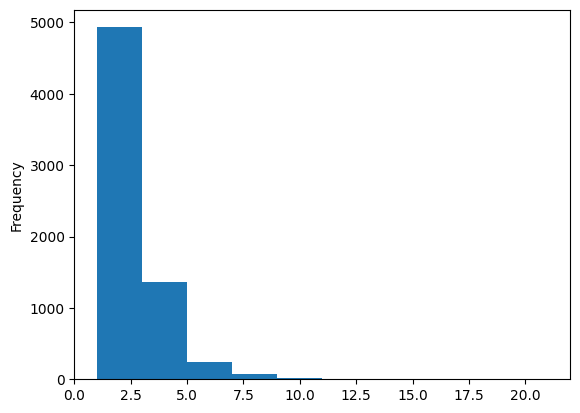

In [10]:
# 충전소당 충전기 개수
charger_cnt = df.groupby('충전소명')['충전기ID'].nunique()
display(charger_cnt.describe())
charger_cnt.plot(kind='hist')

In [11]:
df['충전기구분'].unique()

array(['완속', '급속'], dtype=object)

In [12]:
df['충전용량'].unique()

array([  7.,  50., 200., 100.,  nan,   8.,  42.,  21.,  14.,  28.,  20.])

In [13]:
df.query("충전기구분 == '완속'")['충전용량'].unique()

array([ 7.,  8., 42., 21., nan, 14., 28.])

In [14]:
# 급속 충전기는 보통 충전용량 50kW를 의미하나, 그 이하의 용량 충전기가 급속으로 라벨링 되어 있음 (https://www.ev.or.kr/portal/chargerkind)
# 향후 급속충전기 데이터를 분리할 때, 주의 필요함
df.query("충전기구분 == '급속'")['충전용량'].unique()

array([ 50., 200., 100.,  nan,  20.])

## 2. 충전시간 분포

In [15]:
# 시간, 분으로 구분된 충전시간 필드 병합 -> charging_min 컬럼 생성 (분)
df['charging_min'] = df['충전시간'].multiply(60).add(df['충전분'])

count    1048255.00
mean         142.62
std         1782.32
min      -120016.00
25%           34.00
50%           70.00
75%          170.00
max      1780167.00
Name: charging_min, dtype: float64

<AxesSubplot: ylabel='Frequency'>

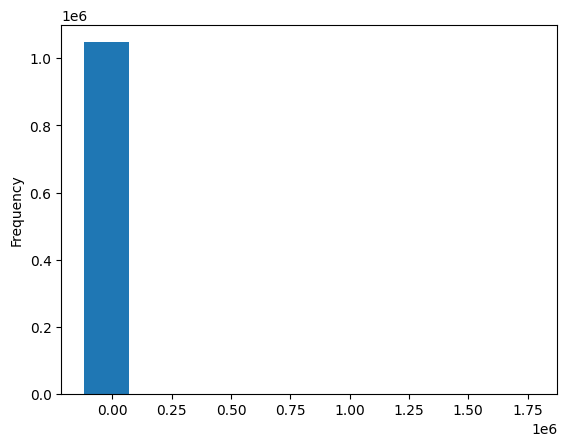

In [16]:
display(df.charging_min.describe())
df.charging_min.plot(kind='hist')

In [17]:
# 충전시간이 음수인 경우
df[df.charging_min.lt(0)]

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,charging_min
967860,광주전남,광주전남직할,첨단산단공영주차장,급속02,10886,광주광역시 북구 첨단연신로 279 (연제동),급속,50.00,51.39,-2001,44,2021-10-09,2022-01-01 01:00:09,2021-10-09 15:15:20,-120016
1022641,광주전남,광주전남직할,첨단산단공영주차장,급속02,10886,광주광역시 북구 첨단연신로 279 (연제동),급속,50.00,41.83,-1850,58,2021-10-15,2022-01-01 01:51:38,2021-10-15 22:53:24,-110942


-  충전시간 및 충전분 속성은 '충전종료시각 - 충전시작시각'으로 계산되어 생성된 속성으로, 기존 속성값에 에러가 그대로 영향을 주는 것으로 보임

In [18]:
# 데이터의 범위 (2021년 7월 ~ 2021년 12월)을 벗어나는 로그 확인

df.loc[df['충전시작시각'].lt('2021-07-01')].sort_values('충전시작시각').head(10)

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,charging_min
956459,경남,진주,경남문화예술회관 주차장,급속01,10672,"경상남도 진주시 강남로 215 (칠암동, 경남문화예술회관)",급속,100.00,17.78,29669,27,2021-10-08,2018-05-21 11:56:10,2021-10-08 17:23:33,1780167
209502,충북,충주,한라비발디아파트,완속01,9412,"충청북도 충주시 목행산단4로 13 (목행동, 한라비발디아파트)",완속,7.00,4.35,2560,49,2021-07-22,2021-04-06 09:56:43,2021-07-22 02:46:39,153649
469455,충북,충주,한라비발디아파트,완속01,9412,"충청북도 충주시 목행산단4로 13 (목행동, 한라비발디아파트)",완속,7.00,36.90,3072,2,2021-08-18,2021-04-12 03:56:54,2021-08-18 03:59:36,184322
384991,충북,충주,한라비발디아파트,완속01,9412,"충청북도 충주시 목행산단4로 13 (목행동, 한라비발디아파트)",완속,7.00,8.28,1535,30,2021-08-09,2021-06-06 11:13:32,2021-08-09 10:44:25,92130
424476,충북,충주,한라비발디아파트,완속01,9412,"충청북도 충주시 목행산단4로 13 (목행동, 한라비발디아파트)",완속,7.00,7.17,1536,41,2021-08-13,2021-06-10 03:32:58,2021-08-13 04:14:46,92201
8284,남서울,강동송파,힐스테이트 강동리버뷰,완속02,10045,"서울특별시 강동구 올림픽로91길 30 (암사동, 힐스테이트 강동 리버뷰)",완속,7.00,42.26,159,40,2021-07-01,2021-06-24 23:59:22,2021-07-01 15:39:40,9580
32319,서울,강북성북,삼선힐스테이트,완속03,8357,서울특별시 성북구 삼선동2가 낙산길 243-15,완속,7.00,5.69,163,41,2021-07-04,2021-06-27 12:42:05,2021-07-04 08:23:07,9821
5348,부산울산,양산,양산신도시 아파트 청어람,완속02,3425,"경상남도 양산시 양주로 94 (남부동, 양산신도시아파트청어람)",완속,7.00,4.66,46,39,2021-07-01,2021-06-29 07:45:01,2021-07-01 06:24:46,2799
9931,경기,하남,미사강변 더샵 리버포레,완속02,7751,경기도 하남시 선동 미사강변북로 65,완속,7.00,3.75,68,10,2021-07-02,2021-06-29 11:56:46,2021-07-02 08:07:09,4090
5210,경기북부,구리,별내아이파크2차,완속01,8652,경기도 남양주시 별내동 덕송1로 30,완속,7.00,53.28,36,3,2021-07-01,2021-06-29 22:07:25,2021-07-01 10:11:10,2163


- 충전시간이 3자리 이상으로 기록된 이상치 존재함

### 급/완속 구분

In [19]:
slow = df.loc[df['충전기구분'] == '완속']
fast = df.loc[df['충전기구분'] == '급속']

In [66]:
# 완속 5,687개, 급속 8,080개의 충전기 존재
slow['충전기ID'].nunique(), fast['충전기ID'].nunique()

(5687, 8080)

In [75]:
# 충전기당 충전횟수 확인 (/일)
slow.groupby('충전기ID')['충전기'].count().divide(184).describe()

count    5687.00
mean        0.44
std         0.35
min         0.01
25%         0.16
50%         0.38
75%         0.64
max         3.60
Name: 충전기, dtype: float64

In [76]:
# 충전기당 충전횟수 확인
fast.groupby('충전기ID')['충전기'].count().divide(184).describe()

count    8080.00
mean        0.39
std         0.82
min         0.01
25%         0.02
50%         0.07
75%         0.42
max        16.52
Name: 충전기, dtype: float64

In [71]:
# 분석기간중에 실질적으로 운영중인 충전기로 한정하기 위해, 6개월 기간 중 첫주와 마지막주에 1건 이상의 기록이 있는 충전기로 제한
fast.groupby('충전기ID')['충전시작시각'].min()

충전기ID
1          2021-08-28 23:17:31
7          2021-07-01 05:42:31
8          2021-09-08 16:35:28
9          2021-07-01 10:27:25
10         2021-07-01 12:13:25
                   ...        
46000002   2021-07-22 23:44:07
46000003   2021-09-18 14:16:24
46000004   2021-07-15 13:53:51
54000001   2021-07-20 10:36:39
55000001   2021-07-31 13:49:25
Name: 충전시작시각, Length: 8080, dtype: datetime64[ns]

In [58]:
import numpy as np

def outlier_bound(array):
    stdev = np.std(array)
    med = np.median(array)
    return med - 3*stdev, med + 3*stdev

outlier_bound(slow.charging_min), outlier_bound(fast.charging_min)

((-1326.7368816772027, 1714.7368816772027),
 (-6988.06154663026, 7068.06154663026))

In [55]:
fast.charging_min.mean()

52.48142011550145

In [56]:
fast.charging_min.median()

40.0

In [32]:
slow[slow.charging_min > outlier_bound(slow.charging_min)[1]]

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,charging_min
2270,경기,성남,위례자연앤센트럴자이 아파트,완속11,10165,"경기도 성남시 수정구 위례광장로 97 (창곡동, 위례 자연앤 센트럴자이)",완속,7.00,52.40,41,28,2021-07-01,2021-06-30 01:14:52,2021-07-01 18:42:57,2488
3588,경기,성남,중앙동 롯데캐슬아파트,완속05,8392,경기도 성남시 중원구 희망로 415,완속,7.00,39.04,39,26,2021-07-01,2021-06-29 22:53:40,2021-07-01 14:20:36,2366
5210,경기북부,구리,별내아이파크2차,완속01,8652,경기도 남양주시 별내동 덕송1로 30,완속,7.00,53.28,36,3,2021-07-01,2021-06-29 22:07:25,2021-07-01 10:11:10,2163
5348,부산울산,양산,양산신도시 아파트 청어람,완속02,3425,"경상남도 양산시 양주로 94 (남부동, 양산신도시아파트청어람)",완속,7.00,4.66,46,39,2021-07-01,2021-06-29 07:45:01,2021-07-01 06:24:46,2799
8284,남서울,강동송파,힐스테이트 강동리버뷰,완속02,10045,"서울특별시 강동구 올림픽로91길 30 (암사동, 힐스테이트 강동 리버뷰)",완속,7.00,42.26,159,40,2021-07-01,2021-06-24 23:59:22,2021-07-01 15:39:40,9580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040701,대전세종충남,아산,아산풍기이지더원1차,완속01,8411,충청남도 아산시 풍기동 514,완속,7.00,54.48,33,17,2021-10-17,2021-10-16 09:31:45,2021-10-17 18:48:54,1997
1040845,대구,대구직할,칠곡부영5단지아파트,완속02,8237,대구광역시 북구 구암동 789,완속,7.00,20.12,29,56,2021-10-17,2021-10-16 12:22:34,2021-10-17 18:18:46,1796
1042461,부산울산,북부산,모라백양그린,완속03,7827,"부산광역시 사상구 모라로110번길 88 (모라동, 백양그린아파트)",완속,7.00,22.28,38,58,2021-10-17,2021-10-15 17:36:31,2021-10-17 08:35:22,2338
1042494,대전세종충남,대덕유성,이지아파트,완속01,8272,대전광역시 유성구 월드컵대로290번길 25,완속,7.00,3.94,37,15,2021-10-17,2021-10-15 18:37:33,2021-10-17 07:52:54,2235


<AxesSubplot: ylabel='Frequency'>

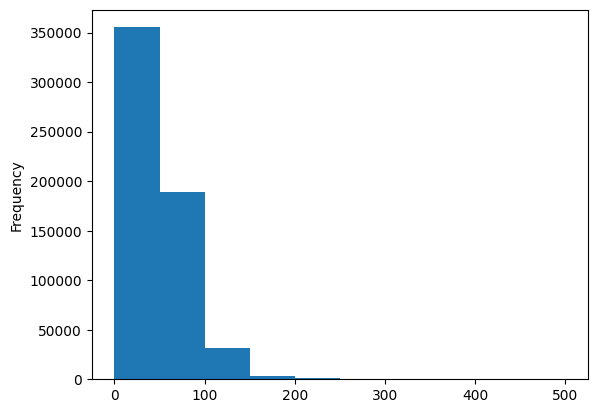

In [47]:
fast.charging_min.plot(kind='hist', range=(0,500))

In [49]:
fast[fast.charging_min > 300]

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,charging_min
504,서울,광진성동,성수동아이파크 아파트,급속01,1922,서울특별시 성동구 성수동2가 성수이로 137,급속,50.00,33.00,11,43,2021-07-01,2021-06-30 19:19:43,2021-07-01 07:03:34,703
888,제주,제주직할,서부농업기술센터,급속02,2180,제주특별자치도 제주시 한림읍 월림7길 90,급속,50.00,26.28,6,38,2021-07-01,2021-07-01 08:32:49,2021-07-01 15:11:47,398
1155,인천,제물포,인천에스케이스카이뷰,급속02,7120,인천광역시 미추홀구 용현동 용정공원로 33,급속,50.00,15.48,11,55,2021-07-01,2021-06-30 19:45:10,2021-07-01 07:40:35,715
1641,경남,마산,마산수출자유지역(관리원),급속01,624,경상남도 창원시 마산회원구 무역로 27,급속,50.00,18.45,8,38,2021-07-01,2021-06-30 22:47:31,2021-07-01 07:26:19,518
2143,제주,제주직할,제주정든마을1단지LH 아파트,급속01,3613,제주특별자치도 제주시 노형동 정존11길 54,급속,50.00,36.13,5,41,2021-07-01,2021-07-01 02:50:21,2021-07-01 08:31:25,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046661,인천,제물포,인천에스케이스카이뷰,급속01,7119,인천광역시 미추홀구 용현동 용정공원로 33,급속,50.00,17.17,13,45,2021-10-17,2021-10-16 19:44:09,2021-10-17 09:29:14,825
1047208,충북,충북직할,충북 MBC,급속01,10185,"충청북도 청주시 흥덕구 2순환로 1322 (가경동, MBC충북)",급속,50.00,10.84,7,44,2021-10-17,2021-10-17 09:58:23,2021-10-17 17:43:19,464
1048051,부산울산,동래,사직 삼환나우빌,급속01,2747,"부산광역시 동래구 쇠미로 72 (사직동, 사직삼환나우빌)",급속,50.00,13.29,5,56,2021-10-17,2021-10-17 12:20:31,2021-10-17 18:16:52,356
1048172,강원,삼척,동부아파트,급속01,6950,"강원도 삼척시 동해대로 4273 (교동, 동부아파트)",급속,50.00,38.49,20,17,2021-10-17,2021-10-16 18:19:21,2021-10-17 14:36:24,1217


In [50]:
fast.charging_min.gt(300).mean()

0.004114760481147399

In [27]:
import numpy as np

np.std(slow.charging_min)

506.9122938924009

In [37]:
fast[fast.charging_min.gt(300)]

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,charging_min
504,서울,광진성동,성수동아이파크 아파트,급속01,1922,서울특별시 성동구 성수동2가 성수이로 137,급속,50.00,33.00,11,43,2021-07-01,2021-06-30 19:19:43,2021-07-01 07:03:34,703
888,제주,제주직할,서부농업기술센터,급속02,2180,제주특별자치도 제주시 한림읍 월림7길 90,급속,50.00,26.28,6,38,2021-07-01,2021-07-01 08:32:49,2021-07-01 15:11:47,398
1155,인천,제물포,인천에스케이스카이뷰,급속02,7120,인천광역시 미추홀구 용현동 용정공원로 33,급속,50.00,15.48,11,55,2021-07-01,2021-06-30 19:45:10,2021-07-01 07:40:35,715
1641,경남,마산,마산수출자유지역(관리원),급속01,624,경상남도 창원시 마산회원구 무역로 27,급속,50.00,18.45,8,38,2021-07-01,2021-06-30 22:47:31,2021-07-01 07:26:19,518
2143,제주,제주직할,제주정든마을1단지LH 아파트,급속01,3613,제주특별자치도 제주시 노형동 정존11길 54,급속,50.00,36.13,5,41,2021-07-01,2021-07-01 02:50:21,2021-07-01 08:31:25,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046661,인천,제물포,인천에스케이스카이뷰,급속01,7119,인천광역시 미추홀구 용현동 용정공원로 33,급속,50.00,17.17,13,45,2021-10-17,2021-10-16 19:44:09,2021-10-17 09:29:14,825
1047208,충북,충북직할,충북 MBC,급속01,10185,"충청북도 청주시 흥덕구 2순환로 1322 (가경동, MBC충북)",급속,50.00,10.84,7,44,2021-10-17,2021-10-17 09:58:23,2021-10-17 17:43:19,464
1048051,부산울산,동래,사직 삼환나우빌,급속01,2747,"부산광역시 동래구 쇠미로 72 (사직동, 사직삼환나우빌)",급속,50.00,13.29,5,56,2021-10-17,2021-10-17 12:20:31,2021-10-17 18:16:52,356
1048172,강원,삼척,동부아파트,급속01,6950,"강원도 삼척시 동해대로 4273 (교동, 동부아파트)",급속,50.00,38.49,20,17,2021-10-17,2021-10-16 18:19:21,2021-10-17 14:36:24,1217


<AxesSubplot: ylabel='Frequency'>

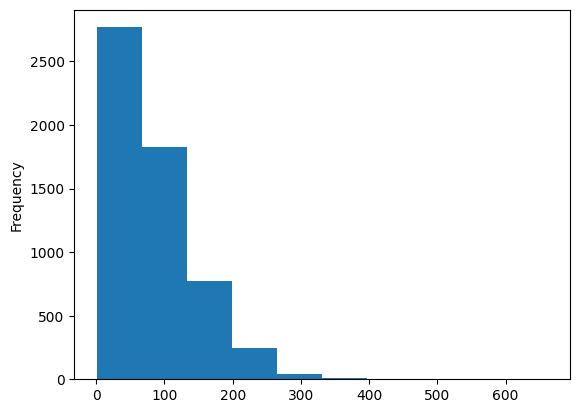

In [42]:
slow.groupby('충전기ID')['충전기'].count().plot(kind='hist')

<AxesSubplot: ylabel='Frequency'>

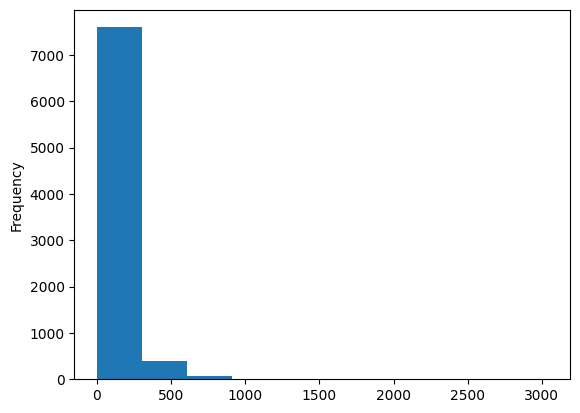

In [45]:
fast.groupby('충전기ID')['충전기'].count().plot(kind='hist')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax  = plt.subplots(figsize=(8,6))

sns.swarmplot(x='충전기구분', y='charging_min', data=df, ax=ax)

In [ ]:
df

In [ ]:
# 충전시간 